---
title: Climate History Practical
subtitle: 
license: CC-BY-4.0
subject: Climate data extraction
venue: Climate History and Paleoclimatology
authors:
  - name: Laura Endres
    email: endres@eaps.ethz.ch
    corresponding: true
  - name: Heather Stoll
    email: heather.stoll@eaps.ethz.ch
date: 2024/10/25
---
____
Prerequisites:
    : Basic familiarity with Python syntax
    : Basic understanding of what a Dansgaard-Oeschger event is
    
    
:::{important} What to expect
- Read in data from a simulation run by the general circulation model (GCM) CESM
- Analyse the average behaviour of different climate variables
- Identify a Greenland stadial event
- Analyse differences between average and stadial conditions for a selection of climate variables 
- Plot and discuss your results
- __Learning Goal__: Being able to load and look at data from a palaeoclimatic model run, and do some basic analysis within a jupyter notebook. Further, understand this notebook well enough so that you are able to make further plots to better understand your lab results.  

:::{tip}Present your findings
- For today: each group should upload one slide to moodle forum to discuss their favourite result
- You can use and modify this workbook further to make some analysis that goes together with your interpretation of Stalagmite Gonzo for your final report due in January.
:::

___

### **_INTRODUCTION_**

#### Scientific Background 

For this exercise we use model data from a simulation of the study "Atmospheric $CO_2$ control of spontaneous millennial-scale ice age climate oscillations" ([Vettoretti et al.,2022](https://doi.org/10.1038/s41561-022-00920-7)).
The simulation is computed using the low-resolution version of the Community Climate System Model Version 4, with a resolution ~3 × 3°. In this general circulation model, the atmosphere and ocean components run separately, but are coupled and exchange values on a regular basis (AOGCM). In contrast, the ice sheets are fixed to the state at the Last glacial maximum and do not evolve.

The simulation we will use is set within a full glacial state (MIS3), with a $CO_2$ concentration fixed to 210 ppm and features spontaneous Dansgaard-Oeschger (DO) oscillations. The stalagmite we are using is growing during a similar time period, and we can therefore use the simulation to get a better understanding about the climate during that time. 

::::{tip} Study Abstract
:class: dropdown

#### Data Availability
It is good scientific practice to make the data of simulations available once a study is published.
There are many reasons for this, but mainly, there are a lot of ressources involved in computing a longer climate simulation, it would be a waste to not reuse this data for further analysis.

Most of the data is huge, up to size of TB. Therefore, if you want to re-use directly from the model results, you often need to use High-Performance-Computing (HPC) infrastructure. 
Nevertheless, as we do here, if you look closely, it is often possible to work with already post-processed data, that gives out average over a certain time period. Here, we work with annual data.
The data we use (and much more related to the same study is available here:
https://sid.erda.dk/cgi-sid/ls.py?share_id=Fo2F7YWBmv


#### **Study Abstract**
Last Glacial millennial-scale climate variability transitioned through distinct cold stadial and warm interstadial states. Here we use Earth system model simulations to demonstrate that nonlinear self-sustained climate oscillations appear spontaneously within a window of glacial-level atmospheric CO2 concentrations (~190–225 parts per million). Outside this window, the system remains in either quasi-stable cold low CO2 or warm high CO2 states, with infrequent and abrupt random transitions driven by noise. In the oscillatory regime, the time between climate transitions is governed by temporal variations in the state of the ocean, atmosphere and sea ice, with CO2 acting as a control on the relative rates of the internal forcing and feedback in the system. The Earth system model results map perfectly to a slow–fast dynamical systems model, where the fixed point of the system transitions into the oscillatory regime through a loss of stability at two critical tipping points, the window boundaries. The deterministic component of the oscillations is modified by a stochastic element associated with internal climate variability. Agreement between observations and the hierarchically disparate models suggests the existence of an internal stochastic climate oscillator, which tracks variations in atmospheric CO2 level through the glacial, acting in concert with noise-induced transitions




### **_CLIMATE MODELS_**

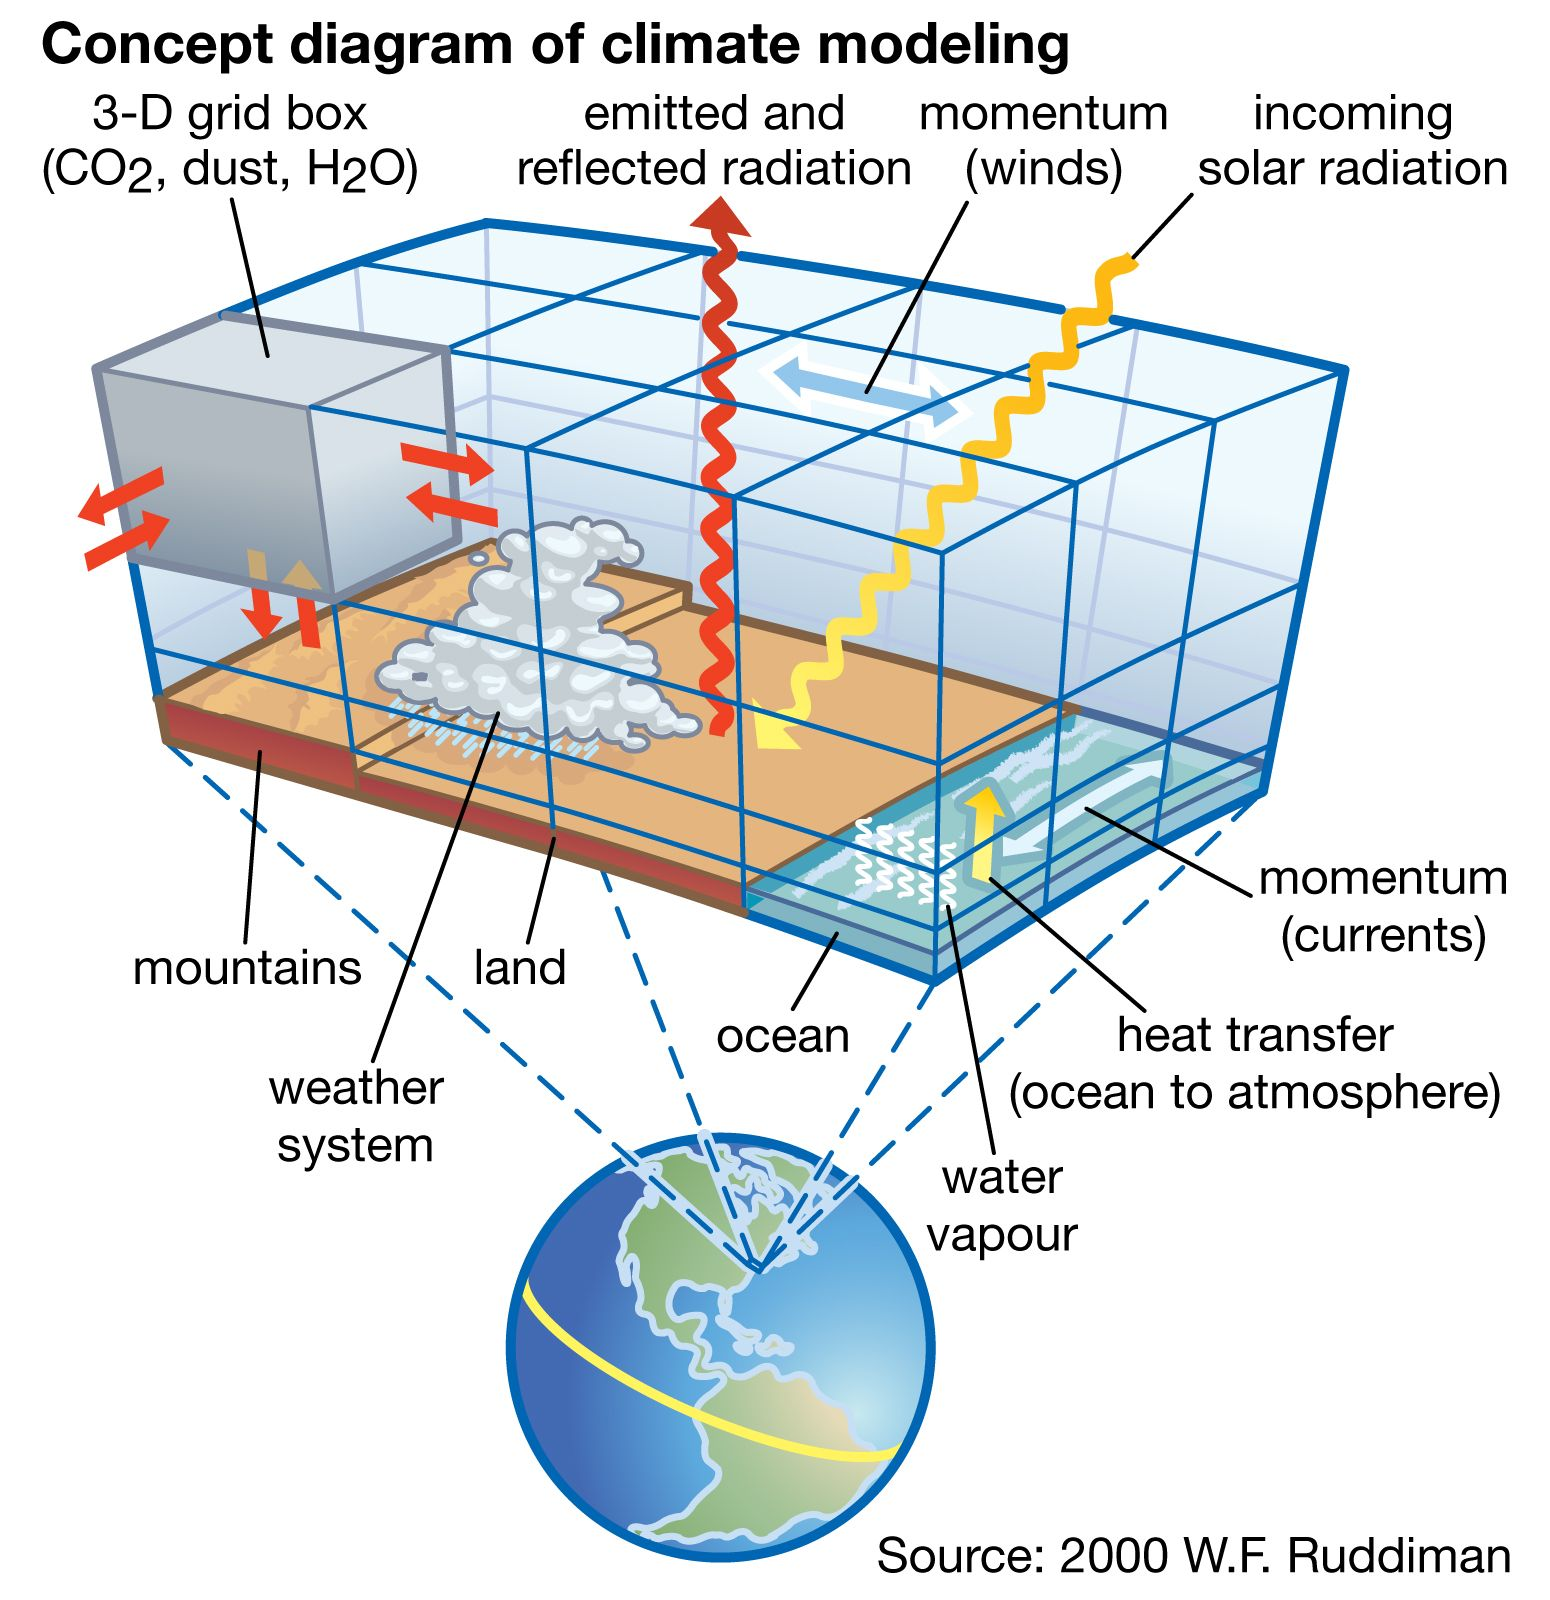



____
### **_PROGRAMMING EXERCISE_**
#### __0. Prepare Python__

We begin by loading the relevant libraries. Those are:

- **matplotlib**: a widely used Python library for creating static, interactive, and animated visualizations in a variety of formats. It is highly flexible and allows users to create publication-quality graphs with ease.
- **xarray**: a powerful Python library designed for working with multi-dimensional labeled data, making it especially useful for analyzing climate model outputs, weather data, and other scientific datasets. It includes handling of netcdf files and builds on top of NumPy and Pandas, providing more flexibility for handling datasets with multiple dimensions, such as time, latitude, longitude, and depth. https://xarray.pydata.org/
- **Cartopy**: is a Python library designed for geospatial data processing and creating maps. It builds on top of Matplotlib to produce high-quality, customizable visualizations of geospatial data, making it particularly useful for climate science, meteorology, oceanography, and other fields dealing with geographic data. 
- **cmcrameri**: scientific colormaps, developed by former ETH postdoc Fabio Crameri
- **numpy**: is a fundamental Python library for numerical computing. It provides support for creating and manipulating large, multi-dimensional arrays and matrices.
- **pandas**: is a powerful data manipulation library built on top of NumPy. It provides easy-to-use data structures, primarily the ```DataFrame```, which allows for flexible and intuitive data manipulation, cleaning, and analysis.

If you work in the moodle JupyterHub environment, these should all be preinstalled, else you need to install via terminal.
By using the command "as", we can create a shortcut to call the library afterwards.



In [ ]:
%matplotlib inline
    
import xarray as xr
import cartopy.feature
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, TwoSlopeNorm, LinearSegmentedColormap, ListedColormap, Normalize

import numpy as np
import pandas as pd

import cmcrameri.cm as cmc

:::{warning} Run code cell
Before you move on, make sure that you have executed the code cell above using `Shift-Enter`, so that the libraries are indeed imported. 
:::


___
#### __1. Open Model Data__

A widely used format for Climate model data is NetCDF (Network Common Data Form). The format is designed for multi-dimensional scientific data. 

We want to load here the output from the Atmosphere model component for one simulation with $CO_2$ fixed to 210 ppm from Vettoretti et al.,2022. The output we look at here is a simplified version of the full output (only selected variables) but the principle remains the same also for a full output file.
The xarray library provides a straightforward framework to work with this kind of data. Although the file we are looking at, is big (1.5GB), loading is rather quick. Though, it is a 'lazy' loading, where the data is prepared and variables names are available, but the actual data is not yet loaded into memory.


In [ ]:
# Open the NetCDF file using xarray
data = xr.open_dataset('data/cesm_short.nc')

# Explore the data in Jupyter Lab
data



:::{tip} Dataset exploration
:label: Dataset exploration

The netcdf allows for many dimensions, as you can see above.
You can explore the dataset by clicking the little triangle on the left of a category.

Have a look at the coordinates dropdown menu: we have a time object with 788 elements, then latitude and longitude, and a height level 'lev'.
For the individual coordinates, you can click on the symbols with the three disks to see the actual values.
This way you can verify the resolution of your simulation (should be around 3°x3° according to the description in the original paper).
If you also have a look at the time vector, you can see that the elements are saved in their own format (cftime). We will deal with this in the data preparation step below.
  
You can also click on the drop-down menu for Data variables to see the available data. The variables have been reduced for this exercise but for your reference the standard atmosphere output from the model has 142 variables. If you are interested in further variables, or need to find which variable to look at, you can refer to published tables, such as presented here: 
https://www.cesm.ucar.edu/community-projects/lens2/output-variables

:::

#### 1.1 Preparation of Selected data for easy access

For the sake of this exercise, the variable names are: 
- Surface Air Temperature: *TS*
- Total precipitation: *PRECT*
- Sea Ice Area: *ICEFRAC*
- The time domain in *YEARS*

In the code cell below, these variables and the time vector are loaded separately into their own variables to access them more easily afterwards. 

Often you need to convert units to a unit useful for analysing climatologies. Here we convert the temperature from K to °C, and the total precipitation computed in m/s into mm/yr.

```{exercise} 
:label: calc_mmyr
What is the factor needed to convert precipitation m/s into the climatologically more meaningful mm/yr?

--> Save it as variable ```p_convert``` in the cell below.

**Note:** Depending on your python proficiency level, you can make this and the following excercises by yourself, or be guided by the solution following the cell below. In this case you just need to copy the code into the cell, and execute it with `shift-enter`!

```



In [ ]:
p_convert = ## Add your calculation here
sat = data['TS'] -273.15 #Surface Air Temperature, convert K to °C
prect = data['PRECT']*p_convert #Total precipitation [m/s] --> mm/yr
icefrac = data['ICEFRAC'] #Sea ice fraction

years = data['time'].dt.year #convert the cftime object to an array that is more easy accessible


````{solution} calc_mmyr
:class: dropdown

Here's one solution to convert precipitation.

```{code-block} python
p_convert = 1000*60*60*24*365
```
````

___
### __2. Identify Dansgaard-Oeschger cycles in your simulation__

The simulation we have is supposed to have [Dansgaard-Oeschger events](https://en.wikipedia.org/wiki/Dansgaard%E2%80%93Oeschger_event) (DO), i.e. abrupt climate fluctuations occuring on a millennial time scale.
The consequences of these events are visible in several climate variables within the ocean, land and atmosphere.
Here, we make use of the surface temperature anomaly that is present in the Northern hemisphere high latitudes: A rapid warming within a few decades, followed by a longer cooling.


```{exercise} 
:label: DO_tseries
#### Plot a time series of high-latitude surface air temperatures to select stadial and interstadial conditions

Make a plot with the model years (we defined before a variable called ```years```) on the x-Axis, and surface air temperature of high latitudes on the y-Axis.
For selecting a high-latitude zonal mean temperature, we can make use of the functions defined in the xarray library.
Specifically, we can select a zonal mean temperature through a command in the line of

```[climate-variable-name].sel(lat=slice([your-low-lat-limit],[your-higher-lat-limit]).mean(dim=['lon','lat'])```

Here, we use the climate variable surface air temperature, which we have previously defined as ```sat```, and you define for yourself a northern high latitude range between the lower limit `your-low-lat-limit`and the upper limit `your-higher-lat-limit`.



```







In [ ]:
### Fill in the missing code here
sat_highlat = ##Your Code here
plt.plot(##Your Code here)
plt.xlabel('Model Years')
plt.ylabel('NH High-latitude zonal mean SAT')


````{solution} DO_tseries
:class: dropdown

Here's one solution to plot the time series.

```{code-block} python
sat_highlat = sat.sel(lat=slice(80,90)).mean(dim=['lon', 'lat'])
plt.plot(years,sat_highlat)
plt.xlabel('Model Years')
plt.ylabel('NH High-latitude zonal mean SAT')

```
````



In this time series, we see that the temperature fluctuations are easily visible.
Towards the end of the model practical, we want to be able to select the 'cold' times (stadials) separately from the 'warm' (interstadial) times.
To do this, we create now here a condition to only select data for points in times where the high latitude SAT was either above or below a ```cut_off_temperature```. These are saved here into new variables ```[climate-variable-name]_stadial``` and ```[climate-variable-name]_istadial```

To test the condition validity, we redo the plot from before, shading the interstadials.
I have selected here a cut_off_temperature of -43°C. Based on your selection of high latitudes, you can vary this.



In [ ]:
cut_off_temperature = -43

sat_stadial = sat.isel(time=sat_highlat < cut_off_temperature)
sat_istadial = sat.isel(time=sat_highlat > cut_off_temperature)

prect_stadial = prect.isel(time=sat_highlat < cut_off_temperature)
prect_istadial = prect.isel(time=sat_highlat > cut_off_temperature)

icefrac_stadial = icefrac.isel(time=sat_highlat < cut_off_temperature)
icefrac_istadial = icefrac.isel(time=sat_highlat > cut_off_temperature)

years_stadial = years[sat_highlat < cut_off_temperature]
years_istadial = years[sat_highlat > cut_off_temperature]

#Plot timeseries with shading
sat_highlat = sat.sel(lat=slice(80,90)).mean(dim=['lon', 'lat'])
plt.plot(years,sat_highlat)
# Shade the regions where the condition is true
plt.fill_between(years,y1=min(sat_highlat),y2=max(sat_highlat),where=sat_highlat > cut_off_temperature,color='green',alpha=0.2)

plt.xlabel('Model Years')
plt.ylabel('NH High-latitude zonal mean SAT')

#Save this figure for further reference
plt.savefig("output/highlatT_tseries.png")

:::{warning} .sel and .isel
In the plot above we have selected subsets based on two different functions (.sel and .isel). Both of them can be handy but they are not the same: 
- .isel selects based on the indices of a dimension, e.g. if you write .isel(lat=0), this selects the first entry of the latitude domain, which is often close to the south pole.
- .sel, in contrast, selects based on the values of the dimension, e.g. if you would write .sel(lat=0), this selects the entry at latitude 0.
:::


___
### __3. Plot Maps of Average distribution and of the difference between stadial and non-stadial__ 

In this section, maps of the average distribution shall be plotted for the climate variables Temperature and Precipitation.
To distribute the workload, groups have been assigned to the two variables. Please solve therefore the exercise and answer the topical questions primarily for your variable during the class (solution under the according heading).

```{exercise} 
:label: globalmaps

#### Plot a map of the average global distribution
1. you can find the code to plot a global map under the heading "Temperature Teams" and "Precipitation-Teams".
2. First, the map_projection is set up, which defines the visual representation of your data on the globe.

:::{tip} Play with different map projections

The ccrs.PlateCarree() lat-lon grid distorts polar regions massively. With a suitable map projection, your visualisation can be a much better representation of the underlying data.

Try to set map_projection to:
- ccrs.Robinson()
- ccrs.Mollweide()
- ccrs.Orthographic()

:::
**Note:** The projection only needs to be changed when setting up the plot, not when plotting the actual data.

3. You don't like the colormap? Un-comment cmc.show_cmaps() in the cell just below to see all available colormaps. If you want to reverse the colormap scale, add `_r`to the name.


### Plot a map of difference between stadial and interstadial
1. Adjust the code from the global map with average values to now make a plot showing a global map of the average difference between the stadial and interstadial condition for your variable. Remember that we defined these separate variables at the end of the section above.

Tip: use a diverging colorbar to plot differences.

```





In [ ]:
#cmc.show_cmaps()

## Temperature-Teams

In [ ]:
# Global map of average distribution

plt.figure(figsize=(10, 6))

# Set up the map projection
map_projection = ccrs.PlateCarree() #CHANGE PROJECTION HERE
ax = plt.axes(projection=map_projection)

# Plot the data using the plot function of xarray
sat.mean(dim='time').plot(ax=ax, transform=ccrs.PlateCarree(), cmap=cmc.devon, cbar_kwargs={'label': 'Surface Air Temperature (K)'}) #change colorscale under cmap

# Add (modern...) coastlines and gridlines
ax.coastlines()
ax.gridlines(draw_labels=True)

# Set the title
plt.title('Surface Air temperature')
plt.tight_layout()

In [ ]:
# Difference Plot
sat_diff = #your code here

### some more code needed...

````{solution} globalmaps
:class: dropdown
Here's one solution to plot a global stadial-interstadial SAT difference map.


```{code-block} python

# Difference Plot
sat_diff = sat_stadial.mean(dim='time')-sat_istadial.mean(dim='time')

plt.figure(figsize=(10, 6))

# Set up the map projection
map_projection = ccrs.Robinson() #CHANGE VALUE HERE
ax = plt.axes(projection=map_projection)

# Plot the data using the plot function of xarray
sat_diff.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=cmc.vik, cbar_kwargs={'label': 'Surface Air Temperature Difference (K)'})

# Add (modern...) coastlines and gridlines
ax.coastlines()
ax.gridlines(draw_labels=True)

# Set the title
plt.title('Stadial - Interstadial Average Annual Surface Temperature')
plt.tight_layout()

```

````





:::{important} Topical questions SAT

1. Where do you find the main anomalies in the differences map? What could be the reason for this? How would you test this?

2. What can you say about the average Temperature distribution? Does it look like you would expect? How is it compared to today's distribution?
3. What about resolution?

:::


## Precipitation-Teams

In [ ]:
#Plot global map of average precipitation 

plt.figure(figsize=(10, 6))

# Set up the map projection
map_projection = ccrs.PlateCarree() #CHANGE VALUE HERE
ax = plt.axes(projection=map_projection)

# Plot the data using the plot function of xarray
prect.mean(dim='time').plot(ax=ax, transform=ccrs.PlateCarree(), cmap=cmc.lapaz_r, cbar_kwargs={'label': 'Precipitation'})

# Add (modern...) coastlines and gridlines
ax.coastlines()
ax.gridlines(draw_labels=True)

# Set the title
plt.title('Precipitation [mm/yr]')
plt.tight_layout()

In [ ]:
# Difference Plot
prect_diff = #your code here

### some more code needed...

````{solution} globalmaps
:class: dropdown
Here's one solution to plot a global stadial-interstadial SAT difference map.


```{code-block} python

# Difference Plot Precip (maybe better as percentage of mean state?)
prect_diff = prect_stadial.mean(dim='time')-prect_istadial.mean(dim='time')

#Plot global map of average surface temperature

plt.figure(figsize=(10, 6))

# Set up the map projection
map_projection = ccrs.Robinson() #CHANGE VALUE HERE
ax = plt.axes(projection=map_projection)

# Plot the data using the plot function of xarray
prect_diff.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=cmc.bam, cbar_kwargs={'label': 'Precipitation Difference'})

# Add (modern...) coastlines and gridlines
ax.coastlines()
ax.gridlines(draw_labels=True)

# Set the title
plt.title('Stadial - Interstadial Average Annual Precipitation')
plt.tight_layout()

```

````



:::{important} Topical questions Total precipitation

1. What is meant by total precipitation actually?
2. What kind of pattern dominate the global mean Precipitation distribution? Is this according to your expectations?
3. Where are the main changes in Precipitation between stadial and interstadial? Is there something surprising?
4. Discuss the differences between Precipitation and Moisture availability. What are the consequences for models and stalagmites?

:::

___

### __4. Extract Data of specific sites for further comparison with proxy data__

You might want to compare your proxy data more directly to the model. Be aware, that this is always 'just' a model, it might have biases, or be not accurate, e.g. due to coarse resolution. Also, we are here extracting just the value at location, but especially for precipitation, the moisture source area might be larger.

Extract now the values for stadial and interstadial conditions for the locations NISA (where Gonzo grows), Greenland Ice core NGRIP, Brazil and China. You might want to refer to the slides from the last lecture on millennial hydroclimate, to understand why these sites are informative to study.

First, for overview, the code below plots a map of the sites we might select for comparison.

In [ ]:
loc_lon = (-4.8067,-42.32,-47.9218,91)
loc_lat = (43.41,75.10,-15.8267,25)
loc_label = ('NISA','NGRIP','BRAZIL','HULU')

plt.figure(figsize=(10, 6))

# Set up the map projection
map_projection = ccrs.PlateCarree()
ax = plt.axes(projection=map_projection)

# Add (modern...) coastlines and gridlines
ax.coastlines()
ax.gridlines(draw_labels=True)

# Set the extent to focus on North Atlantic Realm
ax.set_extent([-100, 140, -20, 80], crs=ccrs.PlateCarree())

plt.plot(loc_lon, loc_lat, color='red', marker='o',linewidth=0,transform=ccrs.PlateCarree())
for i in range(4):
    plt.text(loc_lon[i], loc_lat[i],loc_label[i],color='Blue')

For further data comparison, it would be useful to have a plot of the time series, 
but also to have the data itself available as a time series and to have quantified the difference between the stadial and interstadial state.

```{exercise} 
:label: datacrunch

The code for the plot itself is already given. 

What you need to add into the loop is a command to update the content of vectors ```export_temp``` and ```export_prect```, so that it exports the model years in one column, and the values for the 4 sites each on a column.  

```



In [ ]:
#Plot time series of values at the different locations

# Define vector for data export
export_temp = np.zeros((len(years),5))
export_prect = np.zeros((len(years),5))
export_temp[:,4] = years
export_prect[:,4] = years

# Define Figure
fig,ax = plt.subplots(nrows=8,ncols=1,sharex=True,figsize=(8,15))

for i in range(4):
    ax[2*i].set_title(loc_label[i])
    ax[2*i].set_ylabel('Temperature (K)')
    ax[2*i].plot(years,sat.sel(lat=loc_lat[i],lon=loc_lon[i],method='nearest'), color='black')
    ax[2*i+1].plot(years,prect.sel(lat=loc_lat[i],lon=loc_lon[i],method='nearest'), color='blue')  
    ax[2*i+1].set_ylabel('Total Precipitation(mm/yr)')

    ### Add code here

plt.tight_layout()


#Save Output as Plot
plt.savefig("output/region_timeseries.png")

df_ts1 = pd.DataFrame(export_temp)
df_ts1.columns = ('NISA','NGRIP','BRAZIL','HULU','model years')

df_ts2 = pd.DataFrame(export_prect)
df_ts2.columns = ('NISA','NGRIP','BRAZIL','HULU','model years')

df_ts1.to_csv('output/SAT_comparison_ts.csv')
df_ts2.to_csv('output/PRECT_comparison_ts.csv')

````{solution} datacrunch
:class: dropdown
Here's one solution to save the time series data. Because this is part of loop over all locations, if you copy from here, you need to make sure that they are on the same indent level!

```{code-block} python
    export_temp[:,i] = sat.sel(lat=loc_lat[i],lon=loc_lon[i],method='nearest')
    export_prect[:,i] = prect.sel(lat=loc_lat[i],lon=loc_lon[i],method='nearest')
```

````

In the code cell below, you can also export the mean of the absolute differences between the stadial and interstadial state.

In [ ]:
#Absolute Comparison dataframe 

loc_diffsat = np.zeros(4)
loc_diffprect =  np.zeros(4)

for i in range(4):
    loc_diffsat[i] = sat_stadial.sel(lat=loc_lat[i],lon=loc_lon[i],method='nearest').mean()- sat_istadial.sel(lat=loc_lat[i],lon=loc_lon[i],method='nearest').mean()
    loc_diffprect[i] =  prect_stadial.sel(lat=loc_lat[i],lon=loc_lon[i],method='nearest').mean()- prect_istadial.sel(lat=loc_lat[i],lon=loc_lon[i],method='nearest').mean()


comp_data = {
    'Location': loc_label,
    'SAT [K]': loc_diffsat,
    'Precip [mm/yr]': loc_diffprect
}

df_diff = pd.DataFrame(comp_data)

#Save to file
df_diff.to_csv('output/diff_OVtable.csv')

#Stadial - Interstadial, show results here
df_diff


:::{important} Topical questions regional impact

1. Describe the differences for the different locations. Do you have an explanation?
2. Are there any surprises?
3. Think of the limitations in this analysis, especially related to using Precipitation. What do we measure in the stalagmites in contrast, and how does this relate?
4. According to the slides on millennial scale variability, East Asian Monsoon should be weaker during stadial events (i.e. Precip change should be negative). Do you have ideas, why you can not observe this in our analysis? And how could you improve it?

:::

### _Bonus: Plot Sea ice fraction_

Another interesting parameter to look at is the distribution of sea ice. 
The sea ice fraction that is plotted here gives an indicator of how much of the cell is covered by sea ice. Therefore a value of "1" would mean 100% is covered by sea ice. Typically, one can plot here a contour line for when 50% of the grid cell is covered by sea ice.

````{exercise} 
:label: seaice

Plot a map showing the 50% sea ice contour line for the mean stadial and interstadial condition.
You can plot the contour lines with the following command:

```{code-block} python
contour_level = [0.5] # Plot the contour line where icefrac = 0.5 (50% ice in grid cell)
icefrac_stadial_mean = icefrac_stadial.mean(dim='time')
contour = ax.contour(icefrac_stadial_mean['lon'], icefrac_stadial_mean['lat'], icefrac_stadial_mean, levels=contour_level, 
                     transform=ccrs.PlateCarree(), colors='blue', linewidths=2)

icefrac_istadial_mean = icefrac_istadial.mean(dim='time')
contour = ax.contour(icefrac_istadial_mean['lon'], icefrac_istadial_mean['lat'], icefrac_istadial_mean, levels=contour_level, 
                     transform=ccrs.PlateCarree(), colors='red', linewidths=2,linestyles='dashed')

```

By checking with the previous plots, can you write the code to plot and save this map now for yourself?


````



In [ ]:
#Plot sea ice fraction

### your code here...


````{solution} seaice
:class: dropdown
Here's one solution to plot the final sea ice map..

```{code-block} python
plt.figure(figsize=(10, 6))

# Set up the map projection
map_projection = ccrs.Robinson() #CHANGE VALUE HERE
ax = plt.axes(projection=map_projection)

# Plot the contour line where icefrac = 0.5 (50% ice in grid cell)
contour_level = [0.5]
icefrac_stadial_mean = icefrac_stadial.mean(dim='time')
contour = ax.contour(icefrac_stadial_mean['lon'], icefrac_stadial_mean['lat'], icefrac_stadial_mean, levels=contour_level, 
                     transform=ccrs.PlateCarree(), colors='blue', linewidths=2)

icefrac_istadial_mean = icefrac_istadial.mean(dim='time')
contour = ax.contour(icefrac_istadial_mean['lon'], icefrac_istadial_mean['lat'], icefrac_istadial_mean, levels=contour_level, 
                     transform=ccrs.PlateCarree(), colors='red', linewidths=2,linestyles='dashed')

# Add (modern...) coastlines and gridlines
ax.coastlines()
ax.gridlines(draw_labels=True)

# Set the title
plt.title('Sea ice fraction')
plt.tight_layout()

plt.savefig("output/seaicemap.png")
```

````








:::{important} Topical questions sea ice

1. Are the differences in sea ice between stadial and interstadial event similar in both hemispheres?
2. How is the sea ice distribution possibly related to deepwater formation? In which condition do you expect AMOC do be stronger?

:::

*You have reached the end of the exercise now, Congrats! :)*
